Understand how to work with (e.g., time until death, recovery, or disease return).

Use like survival curves to compare treatments.

Perform to check if one treatment is better than another.

Explore more complex situations, like:

When patient condition changes over time.

When different patients have different risk patterns.

When patients might experience different types of outcomes **bold text**

In [71]:
!pip install lifelines --quiet
# Import necessary libraries
from lifelines import KaplanMeierFitter,CoxPHFitter,AalenJohansenFitter
from lifelines.statistics import logrank_test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/veteran.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            274 non-null    int64 
 1   TIME          274 non-null    int64 
 2   Y             274 non-null    int64 
 3   trt           274 non-null    object
 4   celltype      274 non-null    object
 5   karno         274 non-null    int64 
 6   diagtime      274 non-null    int64 
 7   age           274 non-null    int64 
 8   priortherapy  274 non-null    object
dtypes: int64(6), object(3)
memory usage: 19.4+ KB


In [19]:
df.head()

,ID,TIME,Y,trt,celltype,karno,diagtime,age,priortherapy
0,1,0,0,standard,squamous,60,7,69,no
1,1,72,1,standard,squamous,60,7,69,no
2,2,0,0,standard,squamous,70,5,64,yes
3,2,411,1,standard,squamous,70,5,64,yes
4,3,0,0,standard,squamous,60,3,38,no


## 1.Kaplan–Meier Survival Curve

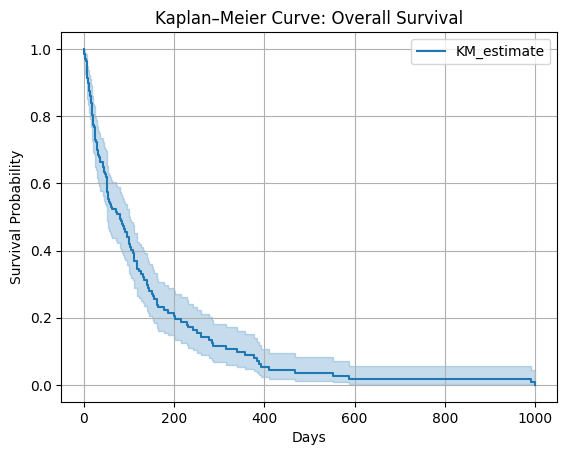

In [21]:
kmf = KaplanMeierFitter()
kmf.fit(df['TIME'], event_observed=df['Y'])

kmf.plot_survival_function()
plt.title('Kaplan–Meier Curve: Overall Survival')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

The Kaplan–Meier Curve shows how survival probability decreases over time.

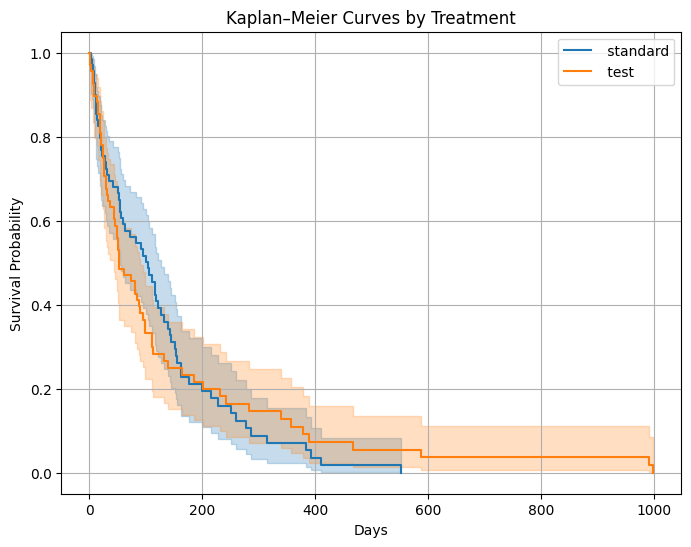

In [73]:
plt.figure(figsize=(8,6))
for group in df['trt'].unique():
    kmf.fit(df[df['trt'] == group]['TIME'], df[df['trt'] == group]['Y'], label=f' {group}')
    kmf.plot_survival_function()

plt.title('Kaplan–Meier Curves by Treatment')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()


Test group shows better survival rate then standard group.

## 2.Log-Rank Test

In [78]:
# Check the unique values in the 'trt' column
print("Unique values in 'trt' column:", df['trt'].unique())

# Use the actual unique values from the 'trt' column to create the groups
# Replace 1 and 2 with the actual unique values you observe in the print output above
unique_treatments = df['trt'].unique()

# Assuming the first two unique values are the ones you want to compare
if len(unique_treatments) >= 2:
    group1_val = unique_treatments[0]
    group2_val = unique_treatments[1]

    group1 = df[df['trt'] == group1_val]
    group2 = df[df['trt'] == group2_val]

    # Check the size of the filtered groups
    print(f"Size of group with trt == {group1_val}:", group1.shape)
    print(f"Size of group with trt == {group2_val}:", group2.shape)

    # Only perform the logrank test if both groups are not empty
    if not group1.empty and not group2.empty:
        results = logrank_test(group1['TIME'], group2['TIME'],
                               event_observed_A=group1['Y'],
                               event_observed_B=group2['Y'])
        print(results.summary)
    else:
        print("One or both groups are empty. Cannot perform log-rank test.")
else:
    print("Not enough unique treatment groups (less than 2) to perform log-rank test.")

Unique values in 'trt' column: ['standard' 'test']
Size of group with trt == standard: (138, 10)
Size of group with trt == test: (136, 10)
   test_statistic         p  -log2(p)
0        0.008227  0.927727  0.108227


Here as we can see p-value is greater than 0.05 that means there is no significant differencebetween the testgroup and standard group

## 3.Cox Proportional Hazards Model


<lifelines.CoxPHFitter: fitted with 128 total observations, 0 right-censored observations>
             duration col = 'TIME'
                event col = 'Y'
      baseline estimation = breslow
   number of observations = 128
number of events observed = 128
   partial log-likelihood = -465.21
         time fit was run = 2025-06-09 06:24:22 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                           
ID                  0.00      1.00      0.01           -0.03            0.03                0.97                1.03
karno              -0.03      0.97      0.01           -0.05           -0.02                0.96                0.98
diagtime           -0.00      1.00      0.01           -0.02            0.01                0.98                1.01
age                -0.01      0.99      0.01           -0.03            0.00                0.97                1.00
trt_test            0.16      1.17      1.02           -1.84            2.16                0.16                8.63
celltype_large     -0.83      0.43      0.36           -1.53           -0.14                0.22                0.87
celltype_smallcell -0.12      0.88      0.38           -0.88            0.63                0.42                1.88
celltype_squamous  -0.97      0.38      0.66           -2.27            0.33                0.10                1.38
priortherapy_yes    0.18      1.20      0.24           -0.28            0.65                0.76                1.91

                    cmp to     z      p  -log2(p)
covariate                                        
ID                    0.00  0.20   0.84      0.25
karno                 0.00 -6.08 <0.005     29.60
diagtime              0.00 -0.47   0.63      0.66
age                   0.00 -1.54   0.12      3.02
trt_test              0.00  0.16   0.88      0.19
celltype_large        0.00 -2.34   0.02      5.71
celltype_smallcell    0.00 -0.32   0.75      0.42
celltype_squamous     0.00 -1.47   0.14      2.82
priortherapy_yes      0.00  0.79   0.43      1.21
---
Concordance = 0.74
Partial AIC = 948.43
log-likelihood ratio test = 62.38 on 9 df
-log2(p) of ll-ratio test = 31.00

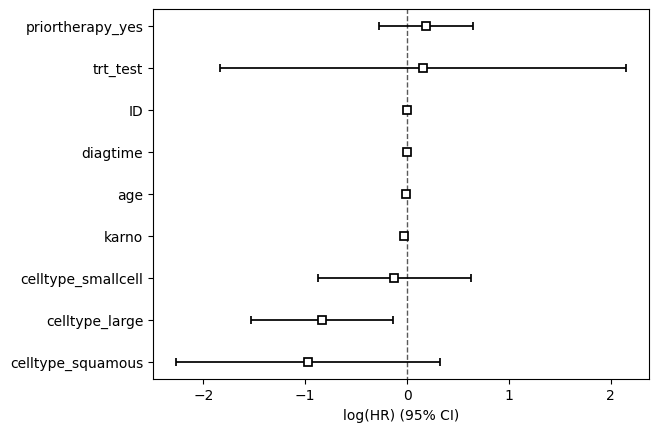

In [53]:
from lifelines import CoxPHFitter
#prepare wide-formate data: one row per subject
df_wide=df_event.copy()
#Encode categorical variables
df_wide=pd.get_dummies(df_wide,columns=['trt','celltype','priortherapy'],drop_first=True)
cph=CoxPHFitter()
cph.fit(df_wide,duration_col='TIME',event_col='Y')
cph.print_summary()
cph.plot()
plt.show()
#if hazard score is >1 then higher risk and <1 less risk

As we can see here the hazard ratio (HR) is more on on negative side than positive side.

## 4.Time-Varying Covariate Model


In [51]:
df_encoded = pd.get_dummies(df, columns=['trt', 'priortherapy'], drop_first=True)

# Fit Stratified Cox Model using 'celltype' as the strata
cph_strat = CoxPHFitter()
cph_strat.fit(df_encoded, duration_col='TIME', event_col='Y', strata=['celltype'])
cph_strat.print_summary()

<lifelines.CoxPHFitter: fitted with 274 total observations, 146 right-censored observations>
             duration col = 'TIME'
                event col = 'Y'
                   strata = celltype
      baseline estimation = breslow
   number of observations = 274
number of events observed = 128
   partial log-likelihood = -315.99
         time fit was run = 2025-06-09 06:13:56 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
ID                0.02      1.02      0.02           -0.01            0.05                0.99                1.05
karno            -0.04      0.96      0.01           -0.05           -0.03                0.95                0.97
diagtime         -0.01      0.99      0.01           -0.02            0.01                0.98                1.01
age              -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
trt_test         -0.90      0.41      1.09           -3.03            1.24                0.05                3.44
priortherapy_yes  0.22      1.24      0.24           -0.25            0.69                0.78                1.99

                  cmp to     z      p  -log2(p)
covariate                                      
ID                  0.00  1.11   0.27      1.90
karno               0.00 -6.52 <0.005     33.73
diagtime            0.00 -0.60   0.55      0.86
age                 0.00 -1.41   0.16      2.65
trt_test            0.00 -0.82   0.41      1.29
priortherapy_yes    0.00  0.90   0.37      1.44
---
Concordance = 0.71
Partial AIC = 643.99
log-likelihood ratio test = 45.48 on 6 df
-log2(p) of ll-ratio test = 24.67

Provides a more accurate model when a covariate like celltype has a non-proportional effect.

This avoids violating the proportional hazards assumption by stratifying its effect.


## 5.Stratified Cox Model


In [64]:
df['id'] = df.index

# Create df_long from df, renaming columns and adding a 'start' column
df_long = df.copy()
df_long = df_long.rename(columns={'TIME': 'stop', 'Y': 'event'})
df_long['start'] = 0 # Assuming time starts at 0 for all subjects

# Encode categorical variables
df_long = pd.get_dummies(df_long, columns=['trt','celltype','priortherapy'], drop_first=True)
ctv = CoxTimeVaryingFitter()

# Ensure all required columns are present in df_long
# 'id', 'start', 'stop', 'event' are now guaranteed by the steps above
required_cols = ['id', 'start', 'stop', 'event'] + list(df_long.columns.difference(['id', 'start', 'stop', 'event']))

# Check if df_long contains all required columns before fitting
if all(col in df_long.columns for col in ['id', 'start', 'stop', 'event']):
    try:
        ctv.fit(df_long, id_col='id', start_col='start', stop_col='stop', event_col='event')
        ctv.print_summary()
    except Exception as e:
        print(f"An error occurred during Ctv fit: {e}")
        print("Please ensure df_long is correctly formatted with 'id', 'start', 'stop', and 'event' columns.")
else:
    print("df_long is missing required columns ('id', 'start', 'stop', or 'event'). Cannot fit CoxTimeVaryingFitter.")

/usr/local/lib/python3.11/dist-packages/lifelines/utils/__init__.py:1033: RuntimeWarning: There exist rows in your DataFrame with start and stop both at time 0:

        >>> df.loc[(df[start_col] == df[stop_col]) & (df[start_col] == 0)]

        These can be safely dropped, which should improve performance.

        >>> df = df.loc[~((df[start_col] == df[stop_col]) & (df[start_col] == 0))]
  warnings.warn(warning_text, RuntimeWarning)


<lifelines.CoxTimeVaryingFitter: fitted with 274 periods, 274 subjects, 128 events>
         event col = 'event'
number of subjects = 274
 number of periods = 274
  number of events = 128
partial log-likelihood = -474.02
  time fit was run = 2025-06-09 06:28:37 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                           
ID                  0.01      1.01      0.01           -0.02            0.04                0.98                1.04
karno              -0.03      0.97      0.01           -0.04           -0.02                0.96                0.98
diagtime           -0.00      1.00      0.01           -0.02            0.02                0.98                1.02
age                -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
trt_test           -0.58      0.56      1.02           -2.58            1.42                0.08                4.15
celltype_large     -0.96      0.38      0.36           -1.66           -0.26                0.19                0.77
celltype_smallcell -0.09      0.91      0.39           -0.86            0.67                0.43                1.95
celltype_squamous  -0.68      0.51      0.67           -1.99            0.64                0.14                1.89
priortherapy_yes    0.11      1.11      0.24           -0.36            0.57                0.70                1.76

                    cmp to     z      p  -log2(p)
covariate                                        
ID                    0.00  0.87   0.38      1.38
karno                 0.00 -6.00 <0.005     28.92
diagtime              0.00 -0.14   0.89      0.17
age                   0.00 -1.13   0.26      1.96
trt_test              0.00 -0.57   0.57      0.81
celltype_large        0.00 -2.69   0.01      7.13
celltype_smallcell    0.00 -0.24   0.81      0.31
celltype_squamous     0.00 -1.01   0.31      1.68
priortherapy_yes      0.00  0.45   0.66      0.61
---
Partial AIC = 966.04
log-likelihood ratio test = 62.86 on 9 df
-log2(p) of ll-ratio test = 31.31

This helps us to find risks taking after the patients has been admitted for the groups


## 6.Competing Risks Model

/usr/local/lib/python3.11/dist-packages/lifelines/fitters/aalen_johansen_fitter.py:112: Warning: Tied event times were detected. The Aalen-Johansen estimator cannot handle tied event times.
                To resolve ties, data is randomly jittered.
  warnings.warn(


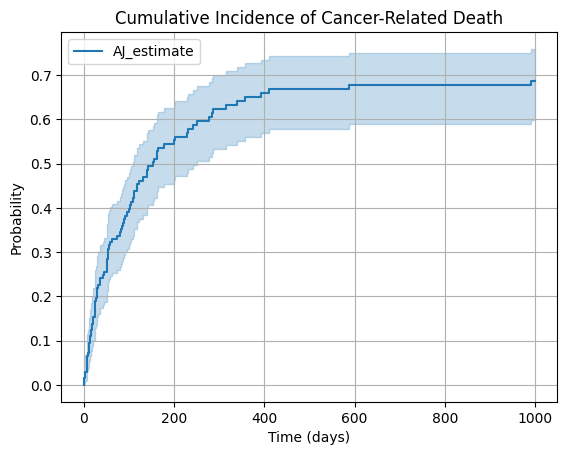

/usr/local/lib/python3.11/dist-packages/lifelines/fitters/aalen_johansen_fitter.py:112: Warning: Tied event times were detected. The Aalen-Johansen estimator cannot handle tied event times.
                To resolve ties, data is randomly jittered.
  warnings.warn(


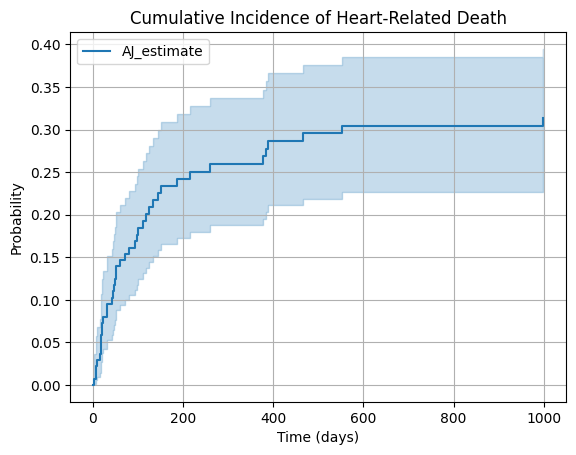

In [80]:
# Mock competing event column:
# 1 = death from cancer, 2 = death from heart failure (for demonstration)
np.random.seed(42)
df['event_type'] = np.where(df['Y'] == 1, np.random.choice([1, 2], size=len(df), p=[0.7, 0.3]), 0)

# Fit Aalen-Johansen for state 0 → 1 (cancer), 0 → 2 (heart)
ajf = AalenJohansenFitter()
ajf.fit(df['TIME'], df['event_type'], event_of_interest=1)
ajf.plot()
plt.title('Cumulative Incidence of Cancer-Related Death')
plt.xlabel('Time (days)')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

# Fit for second competing event
ajf.fit(df['TIME'], df['event_type'], event_of_interest=2)
ajf.plot()
plt.title('Cumulative Incidence of Heart-Related Death')
plt.xlabel('Time (days)')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


THis shows real time data of survival of a patients according to time period they lived as death by cancer or death by heartattack
